# Import Necessary Libraries for Modeling

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import h5py
import math

# import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('bright')

# import Warnings to ignore
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(0)

#for Normalization 
from sklearn.preprocessing import MinMaxScaler

# Machine learning Libraries
from sklearn.model_selection import train_test_split

# import ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Flatten,LeakyReLU
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax,Nadam

# PART-I

## • DOMAIN: 
Electronics and Telecommunication
## • CONTEXT: 
A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters. 
## • DATA DESCRIPTION: 
The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

### 1. Import Data

In [2]:
# import data
signal_data = pd.read_csv("Part- 1 - Signal.csv")

In [3]:
# Lets see the first 5 rows in the data
signal_data.head()

# Obser ation : We have seen  that All the columns are of float type Except TargetVaribale

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# checking for size and shape of data
print(signal_data.shape)
print(signal_data.size)

# Observation : We have 12 columns and 1599 Rows

(1599, 12)
19188


In [5]:
# Lets check datatypes of columns
signal_data.dtypes

# Observation we have seen that all the columns are of Float type except TargetVAriable

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [6]:
# check for info of the data
signal_data.info()

# observation : We can see that there are no null values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2. Data analysis & visualisation

In [7]:
# Lets check for Mean,median and sd of the dataset
signal_data.describe().T

# Observation : We have seen that mean values are different for Every column. 

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


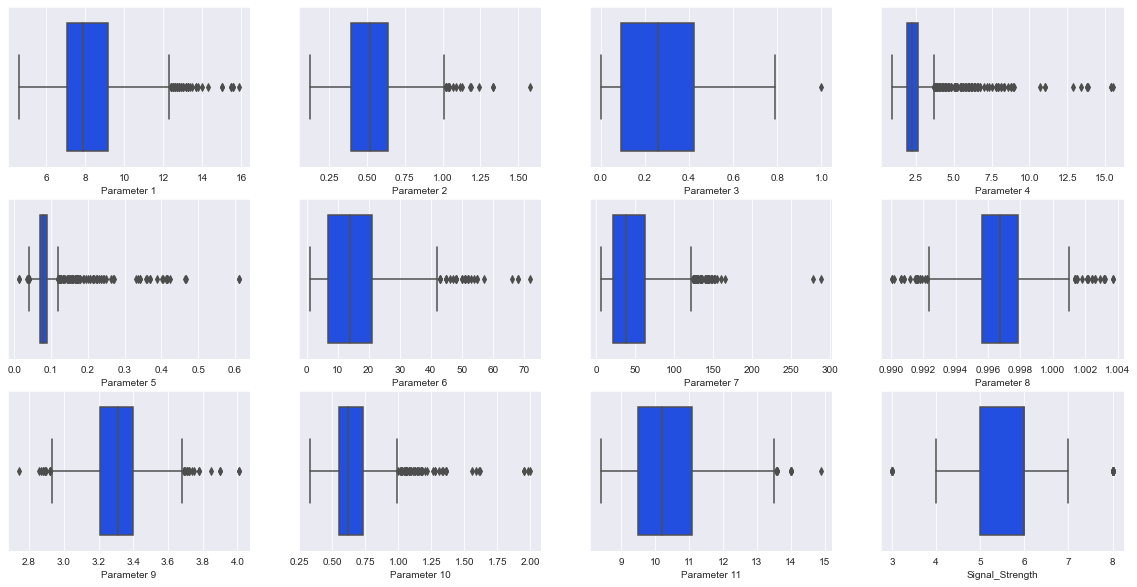

In [8]:
# plotting Box plot for columns in the data
cols=signal_data.columns
fig,ax = plt.subplots(3,4,figsize=(20,10))
k=0
for i in range(3):
    for j in range(4):
        sns.boxplot(signal_data[cols[k]],ax=ax[i][j])
        k=k+1

##### observation : We have seen that All the columns have some outliers and they are not normally distributed.Values of target Varibale is ranges from 3 to 8

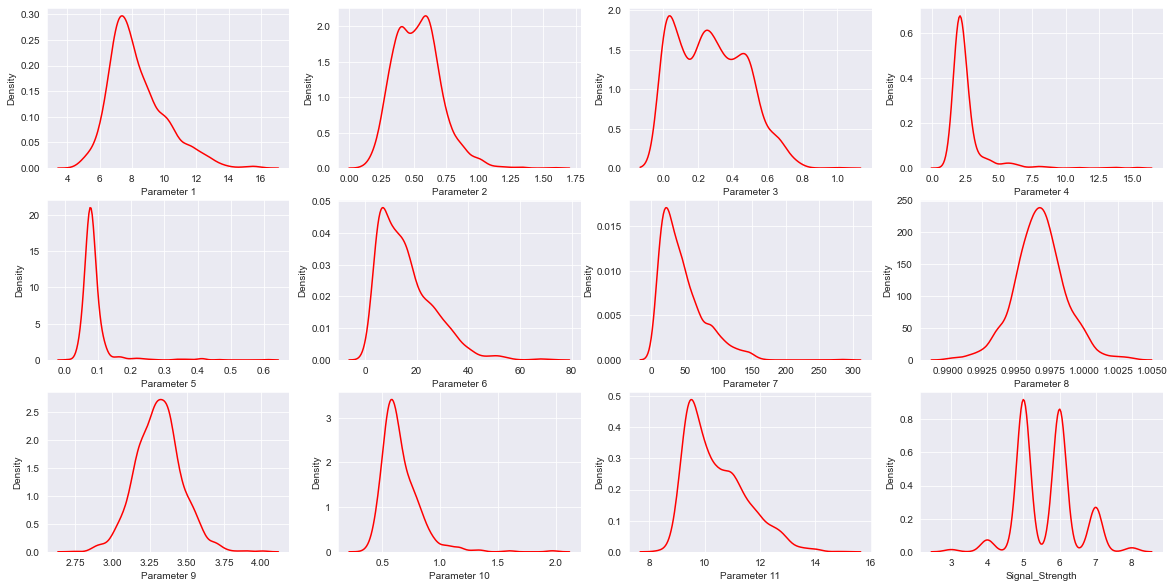

In [9]:
# Lets plot Distplot for the columns to know the distribution of the values
cols=signal_data.columns
fig,ax = plt.subplots(3,4,figsize=(20,10))
k=0
for i in range(3):
    for j in range(4):
        sns.distplot(signal_data[cols[k]],ax=ax[i][j],hist=False,color='red')
        k=k+1

##### Observation : We have Seen that Most of the columns are left skewed distribution.columns nams called P8 and P9 are partially distributed. When we see p3 columns it has three Clusters in the data so the the P8 columns are of three types of distributions. We should Scale the data to get better results for modelling.

<AxesSubplot:>

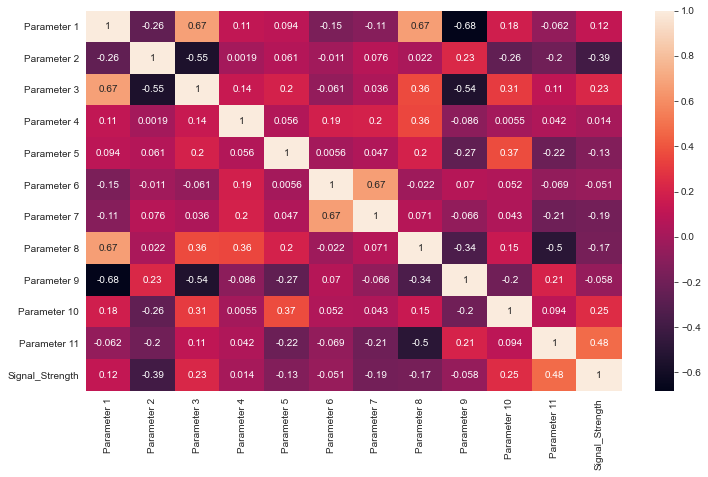

In [10]:
# Plot heatmap for the Signal-data
plt.figure(figsize=(12,7))
sns.heatmap(signal_data.corr(),annot=True)

##### Observation : We have seen that There are no columns are highly correlated all All the columns will be useful for modelling.

<Figure size 720x504 with 0 Axes>

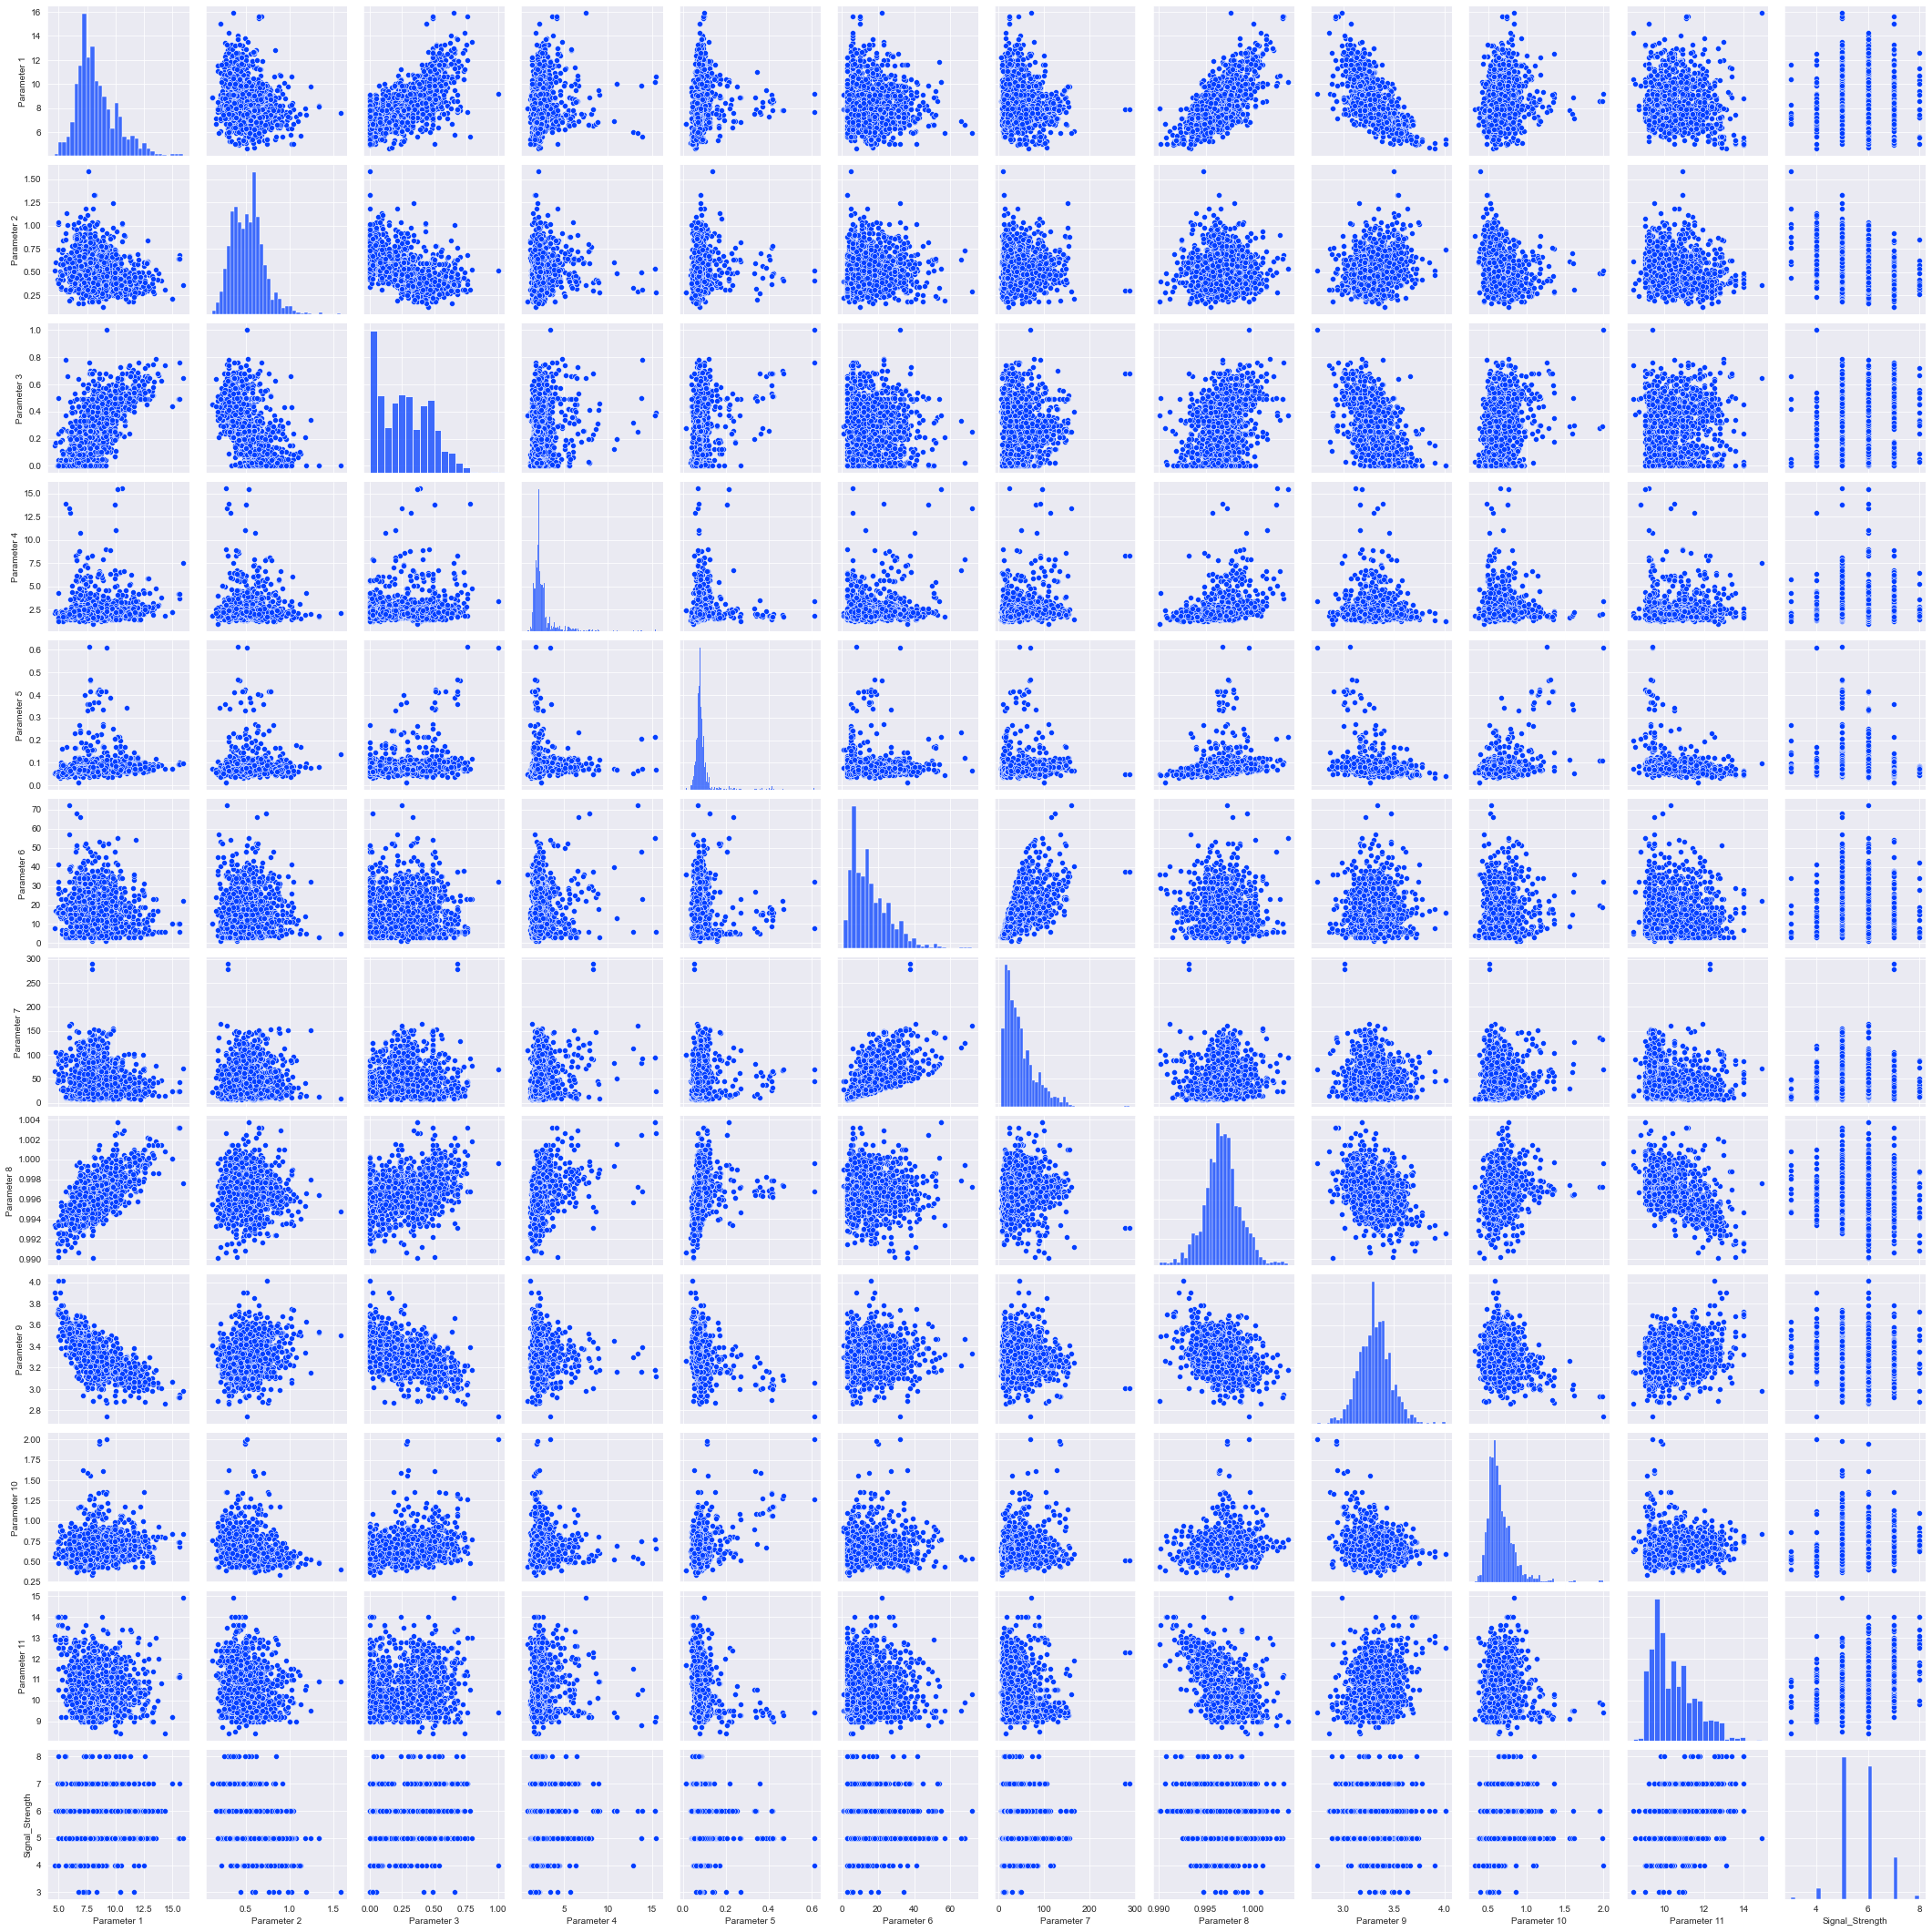

In [11]:
# plot Pair plot for data
plt.figure(figsize=(10,7))
sns.pairplot(signal_data)

### 3. Train,Test and Split

In [12]:
# split the data predictors vs Target

X = signal_data.drop('Signal_Strength',axis=1)
y = signal_data['Signal_Strength']

In [13]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

In [14]:
# perform train-test split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=47,test_size=0.25)

### 4. Design, train, tune and test a neural network regressor. 

#### Train Neural Network

In [15]:
# initialize the model
reg_model = Sequential()

# adding hidden layers
reg_model.add(Dense(32,input_dim=11,activation='relu'))
reg_model.add(BatchNormalization())
reg_model.add(Dense(32,activation='relu'))
reg_model.add(Dense(1,activation='relu'))

# initialize Activation funtion
adam = optimizers.Adam()
reg_model.compile(optimizer=adam,loss='mse')

# check for summary of model
reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,601
Trainable params: 1,537
Non-trainable params: 64
_________________________________________________________________


In [16]:
# train the model
reg_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
38/38 [==============================] - 3s 44ms/step - loss: 25.9333 - val_loss: 28.8086
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 14.7932 - val_loss: 21.2096
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 5.0730 - val_loss: 13.3377
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 1.9867 - val_loss: 8.5017
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 1.0909 - val_loss: 5.5115
Epoch 6/50
38/38 [==============================] - 0s 3ms/step - loss: 0.7756 - val_loss: 3.8338
Epoch 7/50
38/38 [==============================] - 0s 3ms/step - loss: 0.7175 - val_loss: 2.8583
Epoch 8/50
38/38 [==============================] - 0s 4ms/step - loss: 0.6367 - val_loss: 2.3997
Epoch 9/50
38/38 [==============================] - 0s 3ms/step - loss: 0.5959 - val_loss: 2.0322
Epoch 10/50
38/38 [==============================] - 0s 3ms/step - loss: 0.5071 - val_loss: 1.6282
Epoch 11/50
3

#### Tune the model

In [17]:
# define a function to tune with hyper parameters

def reg_model_hp(optimizer,Lambda,activation):
    # initialize the model
    model = Sequential()

    # adding hidden layers
    model.add(Dense(30,input_dim=11,activation=activation,kernel_regularizer=regularizers.l2(Lambda)))
    model.add(BatchNormalization())
    model.add(Dense(1,activation=activation,kernel_regularizer=regularizers.l2(Lambda)))

    # initialize Activation funtion
    model.compile(optimizer=optimizer,loss='mse')
    model.fit(X_train,y_train,epochs=50,batch_size=30)

In [18]:
# lets try to find best learning rate and Lambda
# tune the hyperparameters
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = reg_model_hp(optimizers.Adam(learning_rate=lr), Lambda,'relu')
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))
    

Epoch 1/50
40/40 [==============================] - 1s 871us/step - loss: 11.9341
Epoch 2/50
40/40 [==============================] - 0s 627us/step - loss: 0.8882
Epoch 3/50
40/40 [==============================] - 0s 823us/step - loss: 0.8538
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.8833
Epoch 5/50
40/40 [==============================] - 0s 605us/step - loss: 0.6210
Epoch 6/50
40/40 [==============================] - 0s 961us/step - loss: 0.6006
Epoch 7/50
40/40 [==============================] - 0s 687us/step - loss: 0.6798
Epoch 8/50
40/40 [==============================] - 0s 580us/step - loss: 0.5081
Epoch 9/50
40/40 [==============================] - 0s 615us/step - loss: 0.5547
Epoch 10/50
40/40 [==============================] - 0s 596us/step - loss: 0.4885
Epoch 11/50
40/40 [==============================] - 0s 604us/step - loss: 0.4931
Epoch 12/50
40/40 [==============================] - 0s 620us/step - loss: 0.5198
Epoch 13/50
40/40 [=======

40/40 [==============================] - 0s 953us/step - loss: 20431.8006
Epoch 41/50
40/40 [==============================] - 0s 943us/step - loss: 20413.3637
Epoch 42/50
40/40 [==============================] - 0s 557us/step - loss: 20395.9656
Epoch 43/50
40/40 [==============================] - 0s 628us/step - loss: 20377.4107
Epoch 44/50
40/40 [==============================] - 0s 939us/step - loss: 20359.0371
Epoch 45/50
40/40 [==============================] - 0s 964us/step - loss: 20340.2601
Epoch 46/50
40/40 [==============================] - 0s 957us/step - loss: 20321.7975
Epoch 47/50
40/40 [==============================] - 0s 937us/step - loss: 20303.0619
Epoch 48/50
40/40 [==============================] - 0s 901us/step - loss: 20284.1456
Epoch 49/50
40/40 [==============================] - 0s 569us/step - loss: 20264.8972
Epoch 50/50
40/40 [==============================] - 0s 556us/step - loss: 20245.5551
Try 4/10: Best_val_acc: None, lr: 53.39825602384168, Lambda: 0.000

Epoch 32/50
40/40 [==============================] - 0s 545us/step - loss: 1375.5238
Epoch 33/50
40/40 [==============================] - 0s 877us/step - loss: 1368.4871
Epoch 34/50
40/40 [==============================] - 0s 579us/step - loss: 1361.3122
Epoch 35/50
40/40 [==============================] - 0s 531us/step - loss: 1355.1875
Epoch 36/50
40/40 [==============================] - 0s 919us/step - loss: 1348.1553
Epoch 37/50
40/40 [==============================] - 0s 555us/step - loss: 1340.6307
Epoch 38/50
40/40 [==============================] - 0s 1ms/step - loss: 1333.7714
Epoch 39/50
40/40 [==============================] - 0s 1ms/step - loss: 1326.9833
Epoch 40/50
40/40 [==============================] - 0s 1ms/step - loss: 1319.8969
Epoch 41/50
40/40 [==============================] - 0s 671us/step - loss: 1312.6546
Epoch 42/50
40/40 [==============================] - 0s 967us/step - loss: 1305.4357
Epoch 43/50
40/40 [==============================] - 0s 959us/step - lo

##### Observation : From above tuning we have seen that
    * When LearningRate is too high and lambda is low then we can see that loss is Exploding and Viceversa.
    * When Learning rate and lambda are too low then the model is not perfromed well.
    * We get the lowest loss when the learning rate is e-2 and lambda is e-6 and Also with lr rate of e-2 and e-3.
    * Lets take the learning rate and lambda values which gives low loss to test the data with diiferent Optimizers and      Activation Functions.

In [19]:
# Lets try with Different Optimizers
Optimizer = [SGD(learning_rate=1e-2), Adam(learning_rate=1e-2),RMSprop(learning_rate=1e-2), Adamax(learning_rate=1e-2),Nadam(learning_rate=1e-2)]
for i in range(len(Optimizer)):
    print('\n------- For Optimizer :', str(Optimizer[i]))
    acc = reg_model_hp(Optimizer[i],1e-5,'relu')


------- For Optimizer : <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x000001B37BED6C40>
Epoch 1/50
40/40 [==============================] - 1s 849us/step - loss: 16.2540
Epoch 2/50
40/40 [==============================] - 0s 604us/step - loss: 0.5552
Epoch 3/50
40/40 [==============================] - 0s 791us/step - loss: 0.4560
Epoch 4/50
40/40 [==============================] - 0s 604us/step - loss: 0.4661
Epoch 5/50
40/40 [==============================] - 0s 625us/step - loss: 0.4124
Epoch 6/50
40/40 [==============================] - 0s 779us/step - loss: 0.4137
Epoch 7/50
40/40 [==============================] - 0s 840us/step - loss: 0.4194
Epoch 8/50
40/40 [==============================] - 0s 607us/step - loss: 0.4179
Epoch 9/50
40/40 [==============================] - 0s 609us/step - loss: 0.3784
Epoch 10/50
40/40 [==============================] - 0s 586us/step - loss: 0.4002
Epoch 11/50
40/40 [==============================] - 0s 620us/step - loss:

40/40 [==============================] - 0s 571us/step - loss: 0.3968
Epoch 46/50
40/40 [==============================] - 0s 535us/step - loss: 0.3582
Epoch 47/50
40/40 [==============================] - 0s 795us/step - loss: 0.3719
Epoch 48/50
40/40 [==============================] - 0s 551us/step - loss: 0.3604
Epoch 49/50
40/40 [==============================] - 0s 538us/step - loss: 0.3878
Epoch 50/50
40/40 [==============================] - 0s 885us/step - loss: 0.3880

------- For Optimizer : <tensorflow.python.keras.optimizer_v2.nadam.Nadam object at 0x000001B37BED6F70>
Epoch 1/50
40/40 [==============================] - 1s 884us/step - loss: 21.2485
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.8624
Epoch 3/50
40/40 [==============================] - 0s 603us/step - loss: 0.5109
Epoch 4/50
40/40 [==============================] - 0s 560us/step - loss: 0.4516
Epoch 5/50
40/40 [==============================] - 0s 561us/step - loss: 0.4488
Epoch 6/50


Observation : We can see All the Optimizers are performed well. SGD Optimizer slightly performed better than other optimizers.So, Lets use SGD optimizer for the Model and Lets check for best Activation function.

In [20]:
activations = ['relu', 'softplus', 'softsign', 'tanh', 'selu', LeakyReLU()]
for i in range(len(activations)):
    print('\n------- For Activation :', str(activations[i]))
    acc = reg_model_hp(SGD(learning_rate=1e-2),1e-5,activations[i])


------- For Activation : relu
Epoch 1/50
40/40 [==============================] - 1s 1ms/step - loss: 17.1608
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.5975
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4639
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4476
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4030
Epoch 7/50
40/40 [==============================] - 0s 965us/step - loss: 0.4451
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4245
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4463
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4642
Epoch 11/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4492
Epoch 12/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4219
Epoch 13/50
40/

40/40 [==============================] - 1s 1ms/step - loss: 12.9468
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5350
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4535
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4769
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4558
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4584
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4970
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4537
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4307
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4683
Epoch 11/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4714
Epoch 12/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4657
Epoch 13/50
40/40 [==============================] - 0s 1ms

#### Test the model

In [21]:
def reg_model():
    reg_model_best = Sequential()
    # adding hidden layers
    reg_model_best.add(Dense(30,input_dim=11,activation='relu',kernel_regularizer=regularizers.l2(1e-5)))
    reg_model_best.add(BatchNormalization())
    reg_model_best.add(Dropout(0.4))
    reg_model_best.add(Dense(1,activation='relu',kernel_regularizer=regularizers.l2(1e-5)))
    reg_model_best.compile(optimizer=SGD(learning_rate=1e-2),loss='mse')
    return reg_model_best

In [22]:
# train the model
reg_model_best = reg_model()
reg_model_best.fit(X_train,y_train,epochs=150,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/150
38/38 [==============================] - 1s 7ms/step - loss: 19.7978 - val_loss: 0.7124
Epoch 2/150
38/38 [==============================] - 0s 3ms/step - loss: 2.3860 - val_loss: 0.6399
Epoch 3/150
38/38 [==============================] - 0s 4ms/step - loss: 1.6113 - val_loss: 0.6735
Epoch 4/150
38/38 [==============================] - 0s 4ms/step - loss: 1.2014 - val_loss: 0.6422
Epoch 5/150
38/38 [==============================] - 0s 4ms/step - loss: 1.1913 - val_loss: 0.6126
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 0.9922 - val_loss: 0.5831
Epoch 7/150
38/38 [==============================] - 0s 3ms/step - loss: 1.0819 - val_loss: 0.5844
Epoch 8/150
38/38 [==============================] - 0s 3ms/step - loss: 1.0675 - val_loss: 0.5778
Epoch 9/150
38/38 [==============================] - 0s 3ms/step - loss: 0.9881 - val_loss: 0.5664
Epoch 10/150
38/38 [==============================] - 0s 5ms/step - loss: 0.9295 - val_loss: 0.5395
Epoch 11

38/38 [==============================] - 0s 3ms/step - loss: 0.4155 - val_loss: 0.4881
Epoch 84/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4782 - val_loss: 0.4887
Epoch 85/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4296 - val_loss: 0.4904
Epoch 86/150
38/38 [==============================] - 0s 4ms/step - loss: 0.4225 - val_loss: 0.4903
Epoch 87/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4417 - val_loss: 0.4896
Epoch 88/150
38/38 [==============================] - 0s 3ms/step - loss: 0.4225 - val_loss: 0.4931
Epoch 89/150
38/38 [==============================] - 0s 4ms/step - loss: 0.4099 - val_loss: 0.4913
Epoch 90/150
38/38 [==============================] - 0s 4ms/step - loss: 0.4221 - val_loss: 0.4853
Epoch 91/150
38/38 [==============================] - 0s 4ms/step - loss: 0.3962 - val_loss: 0.4946
Epoch 92/150
38/38 [==============================] - 0s 5ms/step - loss: 0.4126 - val_loss: 0.4904
Epoch 93/150


In [23]:
# test the model
reg_model_best.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.4702


0.47021228075027466

##### we get mse loss of 0.4845 on unseen data which could be best when comaperd with other hyperparameters. lets save the model for future use.

In [24]:
# save the model for future use
import pickle

pickle.dump(reg_model,open('signal_model_file','wb'))

### 4. Conclusion

* We can see that good loss is at when learning rate is low.If Learning rate is too high then the loss is Exploding.so, we use loww learning rate
* We can use Dropout function in place of Batch Normalization.
* In this model i used Adam as loss optimizer but we can also check for different optimizers.
* For non linearity i used Relu activation and We can also try other Activation Functions like signoid and tanh.
* Neural network for Regression problems is not a good idea beacuase it leads to overfit the data. We can see that loss in train is good but when evaluate the data we can see that loss is high.
* So, Ensemble and Machine learning Algorithms are good for regression Problem.

#### ==================================================================================================================

#### 

# PART-II

## • DOMAIN: 
Autonomous Vehicles
## • BUSINESS CONTEXT: 
A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. 
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. 
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. 
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.
## • DATA DESCRIPTION:
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

### 1. Import Data

In [25]:
# import the data

data = h5py.File("Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r')

In [26]:
# lets see the key values in data
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### 2. Data pre-processing and visualisation

In [27]:
# split the train and test data.
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

In [28]:
# lets see the features and labels of One Example in both train and test data
X_train[:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [29]:
y_train[:1]

array([2], dtype=uint8)

In [30]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [31]:
y_test[:1]

array([1], dtype=uint8)

#### Let's Visualise the some numbers in train data.

Label : 2


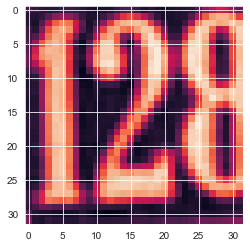

In [32]:
# lets print 10th label and visualize the image.
print('Label :',y_train[0])
plt.imshow(X_train[0])

Label : 7


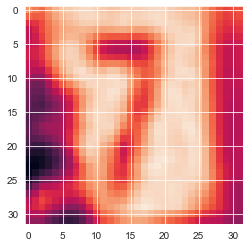

In [33]:
# lets print 150th label and visualize the image
print('Label :',y_train[150])
plt.imshow(X_train[150])

Label : 6


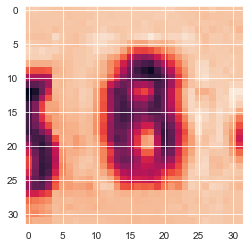

In [34]:
# lets print 2500th label and visualize the image
print('Label :',y_train[2500])
plt.imshow(X_train[2500])

#### Let's Visualise the some numbers in test data.

Label : 4


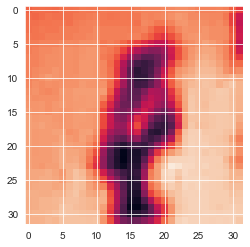

In [35]:
# lets print 1700th label and visualize the image
print('Label :',y_test[1700])
plt.imshow(X_test[1700])

Label : 3


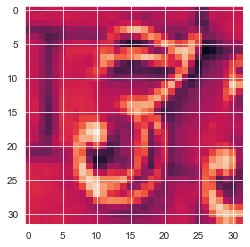

In [36]:
# lets print 5000th label and visualize the image
print('Label :',y_test[5000])
plt.imshow(X_test[5000])

#### Reshape the data

In [37]:
# lets print shape of the data
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (42000, 32, 32)
y_train : (42000,)
X_test : (18000, 32, 32)
y_test : (18000,)


 Observation : we can see that our data is in 3D tensor. So, We need to covert into 2D tensor because we need to feed data into model as 2D tensor.

In [38]:
# Let's Reshape the data.
X_train = X_train.reshape(42000,(32*32))
X_test = X_test.reshape(18000,(32*32))

print('After Reshaped : \n')
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)

After Reshaped : 

X_train : (42000, 1024)
X_test : (18000, 1024)


Observation : Now After Reshape the data is 2d tensor we can feed it to the Model.

#### Normalize the data

In [39]:
# lets see the Min and max values of the train and test data
print('Train data :')
print('Min-value :',X_train.min())
print('Max-value :',X_train.max())
print('\nTest data :')
print('Min-value :',X_test.min())
print('Max-Value :',X_test.max())

Train data :
Min-value : 0.0
Max-value : 254.9745

Test data :
Min-value : 0.0
Max-Value : 254.9745


Observation : We can see that Max value is close to 255 so we need to mormalize the data to get good results. lets divide the data set values with max value so that data will lie between 0-1 which will be get the normalized data.

In [40]:
# Normalize the data
X_train = X_train/254.9745
X_test = X_test/254.9745

print('After Normalize:\n')
print('Train data :')
print('Min-value :',X_train.min())
print('Max-value :',X_train.max())
print('\nTest data :')
print('Min-value :',X_test.min())
print('Max-Value :',X_test.max())

After Normalize:

Train data :
Min-value : 0.0
Max-value : 1.0

Test data :
Min-value : 0.0
Max-Value : 1.0


Observation : Now our data looks clean. From above analysis we can see that Target varibale is of Vector type. Lets convert it to Binar class vectors so that model can easily Understand.

#### Encoding the Target variable

In [41]:
# Here We use to_categorical function to convert Target varibale.
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

# After Encoding
print(y_train[1])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 3. Design, train, tune and test a neural network image classifier.

#### Train the Model

In [42]:
# Lets initialoze the neural network model
model = Sequential()
model.add(Flatten())
model.add(Dense(256,input_shape=(1024,),activation ='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/50
840/840 [==============================] - 6s 5ms/step - loss: 1.7265 - accuracy: 0.4307 - val_loss: 1.8533 - val_accuracy: 0.4091
Epoch 2/50
840/840 [==============================] - 4s 5ms/step - loss: 1.1004 - accuracy: 0.6550 - val_loss: 1.2319 - val_accuracy: 0.5995
Epoch 3/50
840/840 [==============================] - 4s 5ms/step - loss: 0.9251 - accuracy: 0.7127 - val_loss: 1.1434 - val_accuracy: 0.6373
Epoch 4/50
840/840 [==============================] - 5s 6ms/step - loss: 0.8479 - accuracy: 0.7368 - val_loss: 1.5041 - val_accuracy: 0.5391
Epoch 5/50
840/840 [==============================] - 5s 5ms/step - loss: 0.8016 - accuracy: 0.7543 - val_loss: 1.2109 - val_accuracy: 0.6289
Epoch 6/50
840/840 [==============================] - 5s 5ms/step - loss: 0.7573 - accuracy: 0.7654 - val_loss: 1.0404 - val_accuracy: 0.6786
Epoch 7/50
840/840 [==============================] - 4s 5ms/step - loss: 0.7156 - accuracy: 0.7824 - val_loss: 1.0679 - val_accuracy: 0.6744
Epoch 

#### Tuning the model

In [43]:
# lets define a function to hyper_tuning the model
def nn_hp(n,optimizer,activation):
    # initialize the model
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256,input_shape=(1024,),activation = activation,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(128,activation=activation,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=n,batch_size=50,validation_data=(X_test,y_test))

In [44]:
# lets check for best optimizers
Optimizer = [SGD(), Adam(),RMSprop(), Adamax(),Nadam()]
for i in range(len(Optimizer)):
    print('\n\nFor Optimizer :',Optimizer[i])
    nn_hp(10,Optimizer[i],'relu')



For Optimizer : <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x000001B37E6D0CA0>
Epoch 1/10
840/840 [==============================] - 4s 4ms/step - loss: 2.0517 - accuracy: 0.3086 - val_loss: 1.4700 - val_accuracy: 0.5228
Epoch 2/10
840/840 [==============================] - 3s 4ms/step - loss: 1.2003 - accuracy: 0.6335 - val_loss: 1.1821 - val_accuracy: 0.6252
Epoch 3/10
840/840 [==============================] - 3s 4ms/step - loss: 1.0555 - accuracy: 0.6775 - val_loss: 1.1918 - val_accuracy: 0.6181
Epoch 4/10
840/840 [==============================] - 3s 4ms/step - loss: 0.9739 - accuracy: 0.7019 - val_loss: 1.0347 - val_accuracy: 0.6802
Epoch 5/10
840/840 [==============================] - 3s 4ms/step - loss: 0.9070 - accuracy: 0.7225 - val_loss: 1.1224 - val_accuracy: 0.6454
Epoch 6/10
840/840 [==============================] - 3s 4ms/step - loss: 0.8544 - accuracy: 0.7381 - val_loss: 1.1968 - val_accuracy: 0.6291
Epoch 7/10
840/840 [=====================

Observation : We can see that From above Optimizers all are Performed well. Adam and Adamax are Slightly Better than others.In this Model i use Adam Optimizer.

In [45]:
# Lets check for best Activation Functions With Adam
activations = ['relu', 'tanh', 'selu', LeakyReLU()]
for i in range(len(activations)):
    print('\n\nFor Activation: ',activations[i])
    nn_hp(10,Adam(),activations[i])



For Activation:  relu
Epoch 1/10
840/840 [==============================] - 7s 6ms/step - loss: 1.7186 - accuracy: 0.4320 - val_loss: 2.2852 - val_accuracy: 0.3216
Epoch 2/10
840/840 [==============================] - 6s 7ms/step - loss: 1.1255 - accuracy: 0.6474 - val_loss: 1.5319 - val_accuracy: 0.5127
Epoch 3/10
840/840 [==============================] - 5s 6ms/step - loss: 0.9390 - accuracy: 0.7104 - val_loss: 1.0900 - val_accuracy: 0.6627
Epoch 4/10
840/840 [==============================] - 5s 6ms/step - loss: 0.8384 - accuracy: 0.7466 - val_loss: 0.9973 - val_accuracy: 0.6934
Epoch 5/10
840/840 [==============================] - 4s 5ms/step - loss: 0.7808 - accuracy: 0.7605 - val_loss: 0.8536 - val_accuracy: 0.7375
Epoch 6/10
840/840 [==============================] - 4s 5ms/step - loss: 0.7348 - accuracy: 0.7734 - val_loss: 1.2990 - val_accuracy: 0.6190
Epoch 7/10
840/840 [==============================] - 4s 5ms/step - loss: 0.7094 - accuracy: 0.7851 - val_loss: 0.8146 - val

Observation : We can see that Relu and Selu are Performed well With Adam Optimizer. So, We use Selu Activation because Relu will make Neurons zero if they are negative.

In [46]:
# lets check for Good Learning rate for Adam Optimizer With Relu Activation Function.
# Lets take values between e1 to e-4.

learning_rate = [1e1,1e-1,1e-2,1e-3,1e-4]
for i in range(len(learning_rate)):
    print('\n\nFor Learning Rate: ',learning_rate[i])
    nn_hp(10,Adam(learning_rate=learning_rate[i]),'selu')



For Learning Rate:  10.0
Epoch 1/10
840/840 [==============================] - 7s 7ms/step - loss: 3112.0013 - accuracy: 0.1030 - val_loss: 120445584.0000 - val_accuracy: 0.0997
Epoch 2/10
840/840 [==============================] - 5s 5ms/step - loss: 3035.5321 - accuracy: 0.1032 - val_loss: 113243192.0000 - val_accuracy: 0.1010
Epoch 3/10
840/840 [==============================] - 4s 5ms/step - loss: 1978.1011 - accuracy: 0.0991 - val_loss: 150063616.0000 - val_accuracy: 0.0967
Epoch 4/10
840/840 [==============================] - 4s 5ms/step - loss: 271.3226 - accuracy: 0.1051 - val_loss: 9955249152.0000 - val_accuracy: 0.1008
Epoch 5/10
840/840 [==============================] - 5s 6ms/step - loss: 5728.8104 - accuracy: 0.1007 - val_loss: 4107552256.0000 - val_accuracy: 0.0992
Epoch 6/10
840/840 [==============================] - 5s 6ms/step - loss: 2234.2589 - accuracy: 0.0994 - val_loss: 3997146112.0000 - val_accuracy: 0.1029
Epoch 7/10
840/840 [==============================] -

Observation : We can see that when Learning rate is high loss is Exploding. When learning is  e-4 then loss is good. So, tarin the data with best optimizer, activation and Learning Rate.We can see that model getting Overfitted so, Lets add a Dropout function to avoid Over Fitting in the MOdel.

In [47]:
# lets define a function to bulid a model with best values
def nn_best_model():
    # initialize the model
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256,input_shape=(1024,),activation = 'selu',kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128,activation='selu',kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [48]:
# train the model
nn_best = nn_best_model()
train = nn_best.fit(X_train,y_train,epochs=150,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/150
840/840 [==============================] - 7s 6ms/step - loss: 2.5058 - accuracy: 0.1373 - val_loss: 1.9117 - val_accuracy: 0.3451
Epoch 2/150
840/840 [==============================] - 5s 6ms/step - loss: 1.8836 - accuracy: 0.3560 - val_loss: 1.5082 - val_accuracy: 0.5276
Epoch 3/150
840/840 [==============================] - 5s 6ms/step - loss: 1.5079 - accuracy: 0.5322 - val_loss: 1.2286 - val_accuracy: 0.6447
Epoch 4/150
840/840 [==============================] - 5s 6ms/step - loss: 1.3008 - accuracy: 0.6139 - val_loss: 1.1319 - val_accuracy: 0.6764
Epoch 5/150
840/840 [==============================] - 5s 6ms/step - loss: 1.1876 - accuracy: 0.6478 - val_loss: 1.0321 - val_accuracy: 0.7011
Epoch 6/150
840/840 [==============================] - 5s 6ms/step - loss: 1.1207 - accuracy: 0.6657 - val_loss: 1.0098 - val_accuracy: 0.7038
Epoch 7/150
840/840 [==============================] - 5s 6ms/step - loss: 1.0604 - accuracy: 0.6808 - val_loss: 0.9727 - val_accuracy: 0.7094

Epoch 58/150
840/840 [==============================] - 4s 5ms/step - loss: 0.5551 - accuracy: 0.8291 - val_loss: 0.5616 - val_accuracy: 0.8423
Epoch 59/150
840/840 [==============================] - 5s 5ms/step - loss: 0.5514 - accuracy: 0.8319 - val_loss: 0.5292 - val_accuracy: 0.8543
Epoch 60/150
840/840 [==============================] - 4s 5ms/step - loss: 0.5534 - accuracy: 0.8300 - val_loss: 0.5245 - val_accuracy: 0.8549
Epoch 61/150
840/840 [==============================] - 5s 5ms/step - loss: 0.5492 - accuracy: 0.8300 - val_loss: 0.5693 - val_accuracy: 0.8380
Epoch 62/150
840/840 [==============================] - 5s 6ms/step - loss: 0.5513 - accuracy: 0.8314 - val_loss: 0.5663 - val_accuracy: 0.8393
Epoch 63/150
840/840 [==============================] - 4s 5ms/step - loss: 0.5504 - accuracy: 0.8308 - val_loss: 0.5571 - val_accuracy: 0.8408
Epoch 64/150
840/840 [==============================] - 5s 6ms/step - loss: 0.5485 - accuracy: 0.8327 - val_loss: 0.5307 - val_accuracy:

Epoch 115/150
840/840 [==============================] - 4s 5ms/step - loss: 0.4756 - accuracy: 0.8570 - val_loss: 0.4928 - val_accuracy: 0.8647
Epoch 116/150
840/840 [==============================] - 4s 5ms/step - loss: 0.4767 - accuracy: 0.8542 - val_loss: 0.5050 - val_accuracy: 0.8585
Epoch 117/150
840/840 [==============================] - 4s 5ms/step - loss: 0.4834 - accuracy: 0.8485 - val_loss: 0.5336 - val_accuracy: 0.8501
Epoch 118/150
840/840 [==============================] - 5s 5ms/step - loss: 0.4778 - accuracy: 0.8525 - val_loss: 0.5117 - val_accuracy: 0.8599
Epoch 119/150
840/840 [==============================] - 5s 5ms/step - loss: 0.4900 - accuracy: 0.8505 - val_loss: 0.4916 - val_accuracy: 0.8635
Epoch 120/150
840/840 [==============================] - 5s 6ms/step - loss: 0.4711 - accuracy: 0.8556 - val_loss: 0.5035 - val_accuracy: 0.8607
Epoch 121/150
840/840 [==============================] - 5s 6ms/step - loss: 0.4736 - accuracy: 0.8539 - val_loss: 0.5171 - val_ac

#### Test the Model

In [49]:
# Evaluate the Model

score = nn_best.evaluate(X_test,y_test)
print('Loss :',score[0])
print('Accuracy :',score[1])

563/563 [==============================] - 2s 2ms/step - loss: 0.4905 - accuracy: 0.8656
Loss : 0.4905378818511963
Accuracy : 0.8656111359596252


### 4. Plot the training loss, validation loss vs number of epochs 

In [50]:
# Store the values of losses and Accuracies
accuracy      = train.history['accuracy']
val_accuracy  = train.history['val_accuracy']
loss     = train.history['loss']
val_loss = train.history['val_loss']
epochs=range(len(accuracy))

<Figure size 432x288 with 0 Axes>

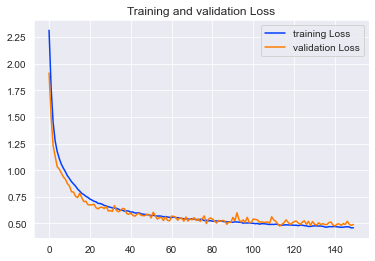

<Figure size 432x288 with 0 Axes>

In [51]:
# Lets plot training loss, validation loss vs number of epochs
plt.plot(epochs, loss, label = 'training Loss' )
plt.plot(epochs, val_loss, label = 'validation Loss' )
plt.title('Training and validation Loss')
plt.legend(loc = 'upper right')
plt.figure()

<Figure size 432x288 with 0 Axes>

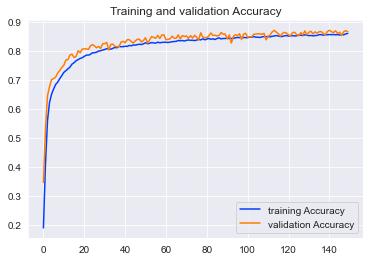

<Figure size 432x288 with 0 Axes>

In [52]:
# Lets plot training accuracy, validation accuracy vs number of epochs
plt.plot(epochs, accuracy, label = 'training Accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation Accuracy' )
plt.title ('Training and validation Accuracy')
plt.legend(loc = 'lower right')
plt.figure()

#### Observation : We can see that Above Plots that 
    * We get a Accuracy on train and Validation is Almost Equal and loss also same on train and Validation.
    * Train Accuracy, train Loss are 0.86, 0.50 Respectively and Validation Accuracy, validation loss are 0.86, 0.49 Respectively
    * We can see our model is Predicting Images 85% correctly and our Model is slightly over fitted.
    * After some Epochs loss and Accuracy are Constant slightly improving. We can improve Epochs Size to get the Results.

In [53]:
# Lets Save the model for Future use
pickle.dump(nn_best_model,open('nn_best_file','wb'))

### 5. Conclusion

* Our Model is Performing Well on test and Train data.
* In this Model We use Adam Optimizer to get better Results with learning rate of 1e-4.
* Selu Activation is used along with Adam to get the loss fastly than other Activation Functions.
* We can try different values for kernel initializer in Hidden layers and different hidden nodes and Epochs for the model.
* In this Model We Managed the loss upto 0.5 with Accuracy of 0.86.